# import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import zscore

# read the file

In [2]:
df=pd.read_csv('cubic_zirconia.csv',index_col=0)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


# check for duplicates

In [3]:
duplicate=df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
df[duplicate]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4757,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8145,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8920,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9819,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10474,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10501,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12895,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13548,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13784,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


# drop duplicates

In [4]:
df.drop_duplicates(inplace=True)

# recheck duplicates

In [5]:
duplicate=df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
df[duplicate]

Number of duplicate rows = 0


,carat,cut,color,clarity,depth,table,x,y,z,price


# check for null values

In [6]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# create function to replcae missing depth value using z and y

In [7]:
def Find_depth(z,y):
    depth=round((z/y)*100,2)
    return depth

In [8]:
for index,value in df['depth'].iteritems():
    if pd.isnull(value):
        df.loc[index,'depth']=Find_depth(df.loc[index,'z'],df.loc[index,'y'])

# recheck missing values

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# check info 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


# descriptive stats for continous variable

In [11]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.764478,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,3.669319,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,617.480000,79.000000,10.230000,58.900000,31.800000,18818.000000


# plot boxplot and distplot for continous variables

In [12]:
col= list(df.select_dtypes(include=['float64','int64']).columns.values)
col

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

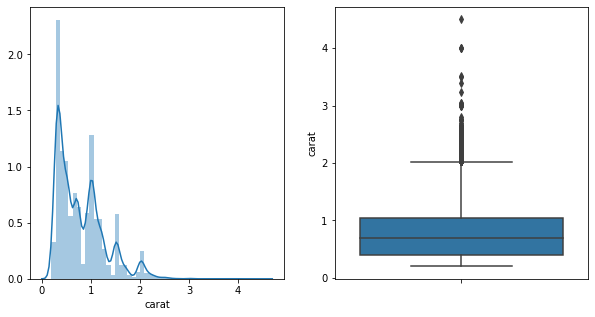

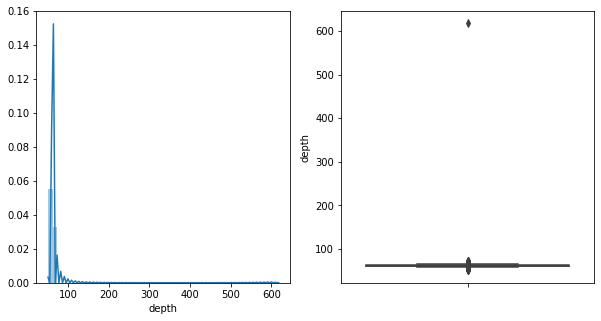

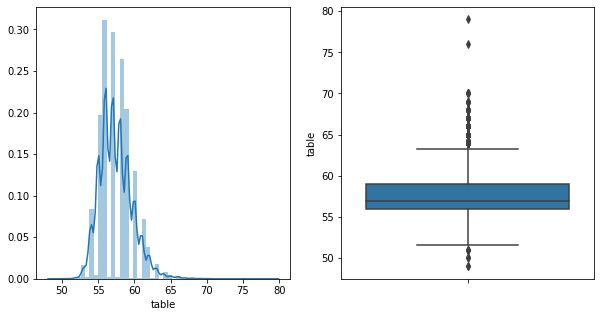

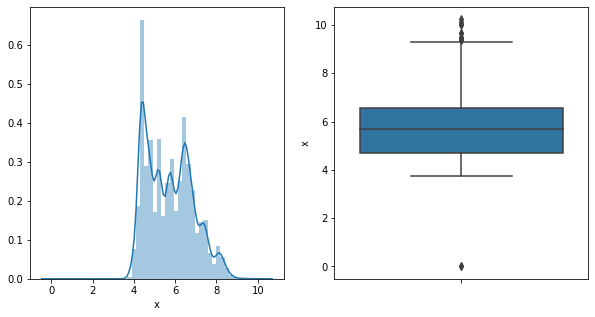

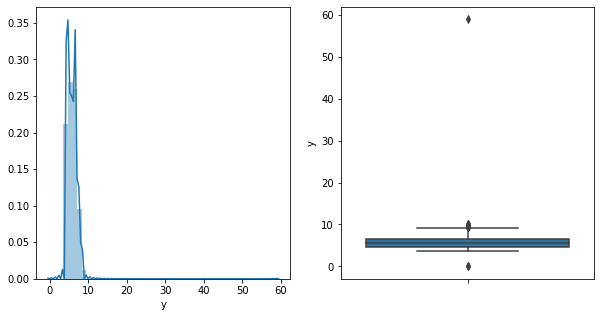

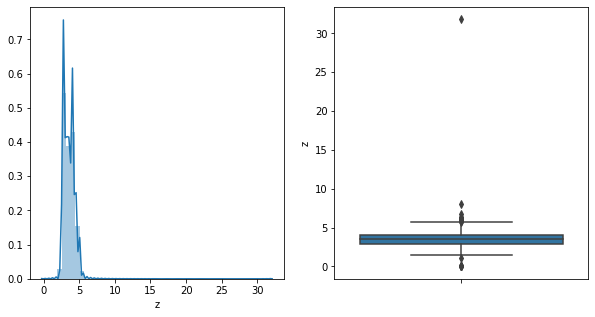

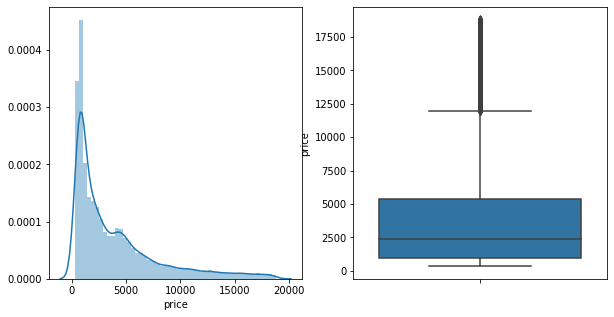

In [13]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(df[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=df, ax=axs[1],orient="v") 

# drop the rows with one extreme value in y and depth(becasue of extreme value in z)

In [14]:
df=df.drop(df[df['depth']==617.48].index)

In [15]:
df=df.drop(df[df['y']==58.9].index)

# boxplot and distplot after removing the two rows

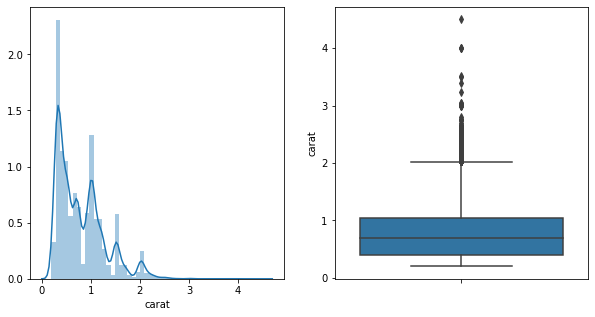

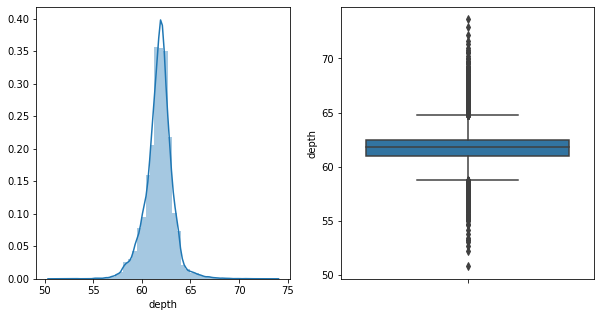

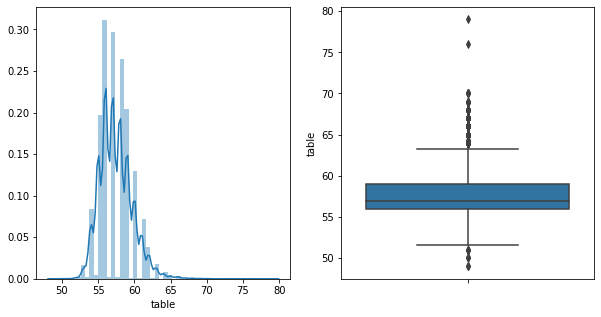

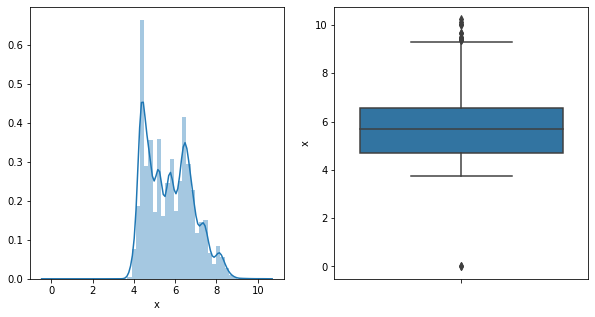

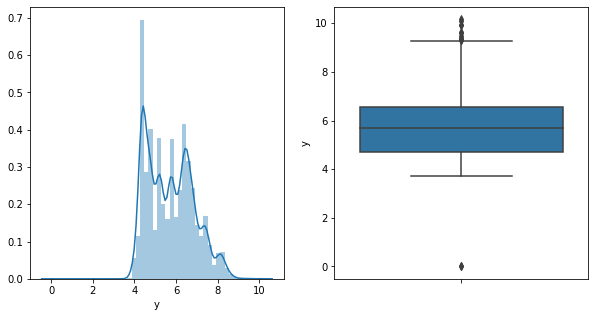

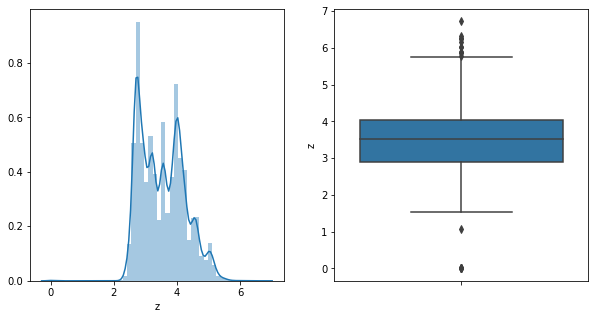

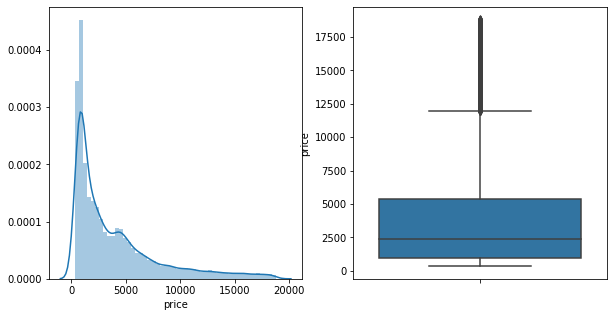

In [16]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(df[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=df, ax=axs[1],orient="v") 

# function for countplot for categorical variables

In [17]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts()/df.shape[0])
    sns.countplot(x=cat_column, data=df, palette='pastel')
    plt.show()
    print("       ")

In [18]:
df_object = df.select_dtypes(include = ['object']) 
lstcatcolumns = list(df_object.columns.values)
lstcatcolumns

['cut', 'color', 'clarity']

Details of cut
----------------------------------------------------------------
Ideal        0.401211
Premium      0.255653
Very Good    0.223757
Good         0.090416
Fair         0.028963
Name: cut, dtype: float64


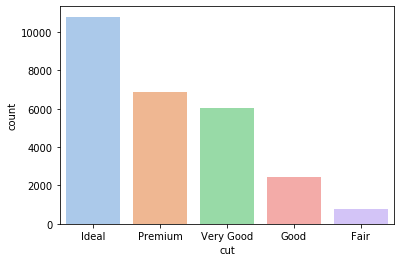

       
Details of color
----------------------------------------------------------------
G    0.209907
E    0.182503
F    0.175374
H    0.152018
D    0.124058
I    0.102670
J    0.053470
Name: color, dtype: float64


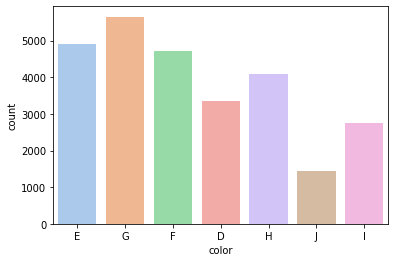

       
Details of clarity
----------------------------------------------------------------
SI1     0.243771
VS2     0.226245
SI2     0.169433
VS1     0.151721
VVS2    0.093944
VVS1    0.068286
IF      0.033085
I1      0.013516
Name: clarity, dtype: float64


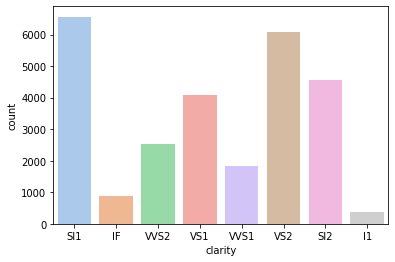

In [19]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

# bi-variate analysis for numerical columns

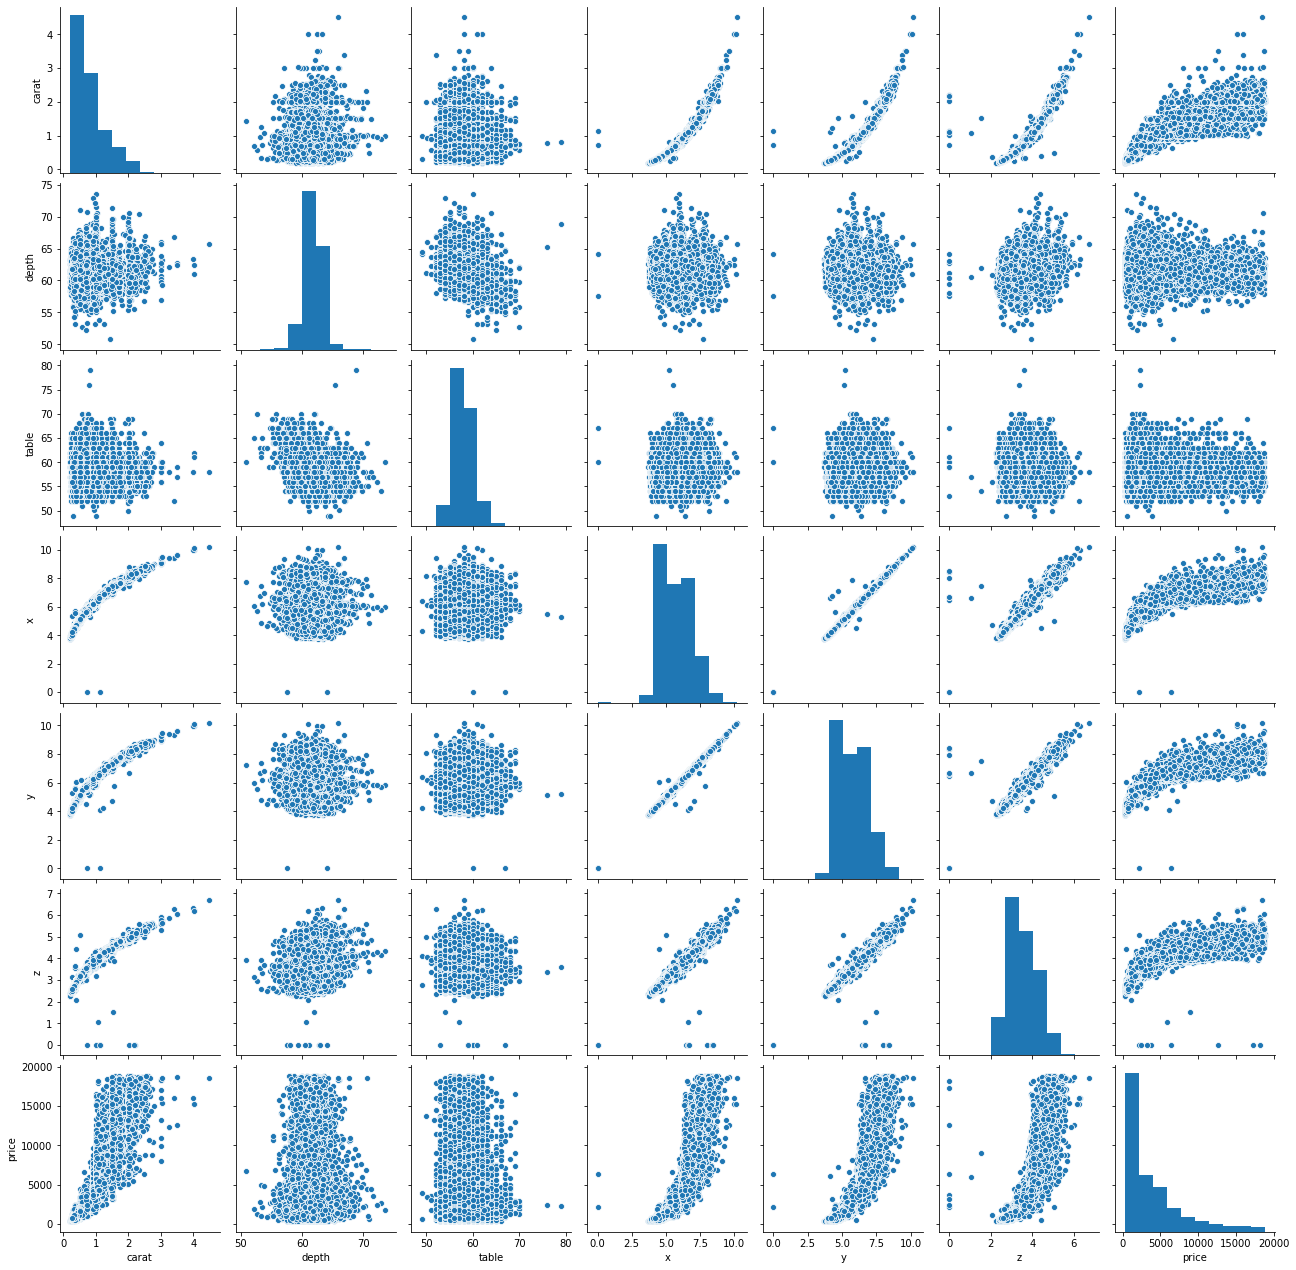

In [20]:
sns.pairplot(df)

# correlation matrix 

In [21]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035434,0.181558,0.976857,0.975772,0.970292,0.922397
depth,0.035434,1.000000,-0.298278,-0.018205,-0.021986,0.102344,-0.003064
table,0.181558,-0.298278,1.000000,0.196268,0.190183,0.155477,0.126851
x,0.976857,-0.018205,0.196268,1.000000,0.998515,0.986248,0.886534
y,0.975772,-0.021986,0.190183,0.998515,1.000000,0.985908,0.888049
z,0.970292,0.102344,0.155477,0.986248,0.985908,1.000000,0.877111
price,0.922397,-0.003064,0.126851,0.886534,0.888049,0.877111,1.000000


# heatmap 

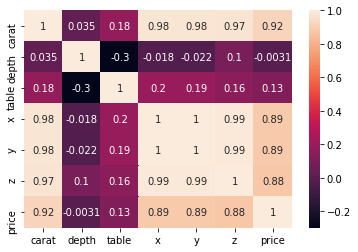

In [22]:
sns.heatmap(df.corr(),annot=True)

# bi-variate analysis for categorical variables

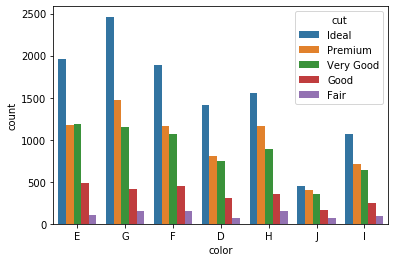

In [23]:
sns.countplot(x=df['color'],hue=df['cut'])

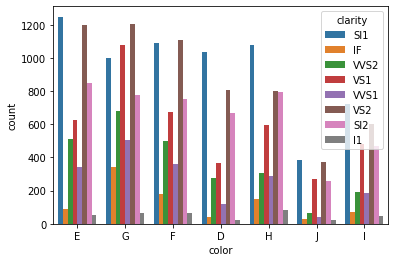

In [24]:
sns.countplot(x=df['color'],hue=df['clarity'])

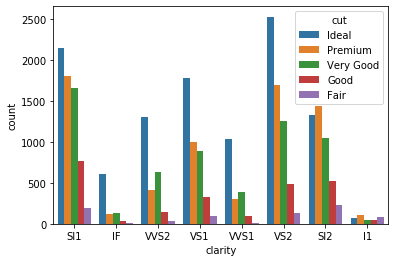

In [25]:
sns.countplot(x=df['clarity'],hue=df['cut'])

# crosstab for categorical variables

In [26]:
pd.crosstab(df['cut'],df['clarity'],normalize='index')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,0.114103,0.005128,0.247436,0.287179,0.119231,0.165385,0.012821,0.048718
Good,0.020534,0.012320,0.313758,0.216427,0.135524,0.201643,0.041068,0.058727
Ideal,0.006849,0.056455,0.198612,0.122536,0.164831,0.233873,0.095882,0.120963
Premium,0.015686,0.016703,0.262745,0.209441,0.144662,0.245897,0.044590,0.060276
Very Good,0.007136,0.021905,0.274311,0.173581,0.147030,0.207932,0.064056,0.104049


In [27]:
pd.crosstab(df['cut'],df['color'],normalize='columns')

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,0.022149,0.020346,0.031336,0.026004,0.036395,0.033996,0.047222
Good,0.093086,0.099695,0.095914,0.073943,0.085735,0.091139,0.111111
Ideal,0.421730,0.400000,0.400381,0.435698,0.378603,0.388065,0.314583
Premium,0.241245,0.238861,0.246454,0.260216,0.282853,0.255696,0.281250
Very Good,0.221790,0.241099,0.225916,0.204139,0.216414,0.231103,0.245833


In [28]:
pd.crosstab(df['color'],df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,25,38,1039,669,369,804,121,276
E,53,87,1249,849,624,1202,342,509
F,67,182,1088,750,672,1106,360,498
G,68,340,998,778,1076,1205,507,681
H,82,149,1081,792,593,803,288,306
I,48,69,724,467,480,600,183,194
J,21,26,386,258,272,373,38,66


# bi-variate analysis for cat and numerical variables

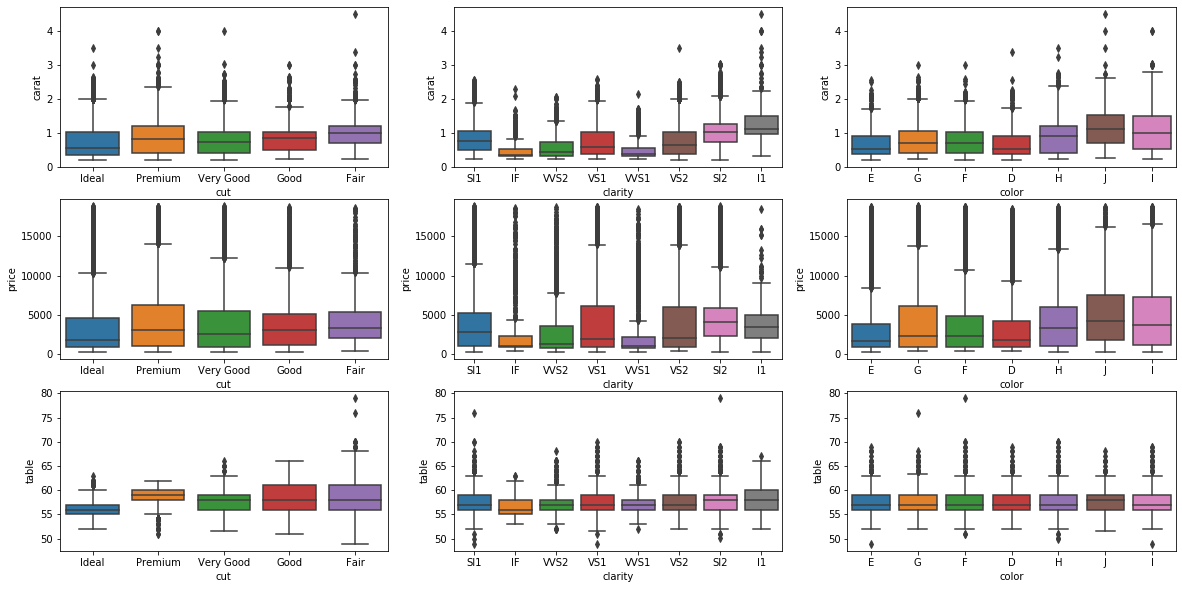

In [29]:
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=fig_dims)
sns.boxplot(x='cut', y='carat', data=df, ax=axs[0][0])
sns.boxplot(x='clarity', y='carat', data=df, ax=axs[0][1])
sns.boxplot(x='color', y='carat', data=df, ax=axs[0][2])
sns.boxplot(x='cut', y='price', data=df, ax=axs[1][0])
sns.boxplot(x='clarity', y='price', data=df, ax=axs[1][1])
sns.boxplot(x='color', y='price', data=df, ax=axs[1][2])
sns.boxplot(x='cut', y='table', data=df, ax=axs[2][0])
sns.boxplot(x='clarity', y='table', data=df, ax=axs[2][1])
sns.boxplot(x='color', y='table', data=df, ax=axs[2][2])

# change categorical variable to numerical

In [30]:
df1=df.copy()

In [31]:
carrier={'cut':{'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}}

In [32]:
df1.replace(carrier,inplace=True)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,4,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,3,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,2,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,4,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,4,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,4,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,3,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26966,0.27,2,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [33]:
clar={'clarity':{'I3':0,'I2':1,'I1':2,'SI2':3,'SI1':4,'VS2':5,'VS1':6,'VVS2':7,'VVS1':8,'IF':9,'FL':10}}

In [34]:
df1.replace(clar,inplace=True)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,4,E,4,62.1,58.0,4.27,4.29,2.66,499
2,0.33,3,G,9,60.8,58.0,4.42,4.46,2.70,984
3,0.90,2,E,7,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,4,F,6,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,4,F,8,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,G,4,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,4,H,9,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,3,E,5,61.7,58.0,5.12,5.15,3.17,1656
26966,0.27,2,F,7,61.8,56.0,4.19,4.20,2.60,682


# one hot encoding for color

In [35]:
df1= pd.get_dummies(df1, prefix='color', columns=['color'],drop_first=True)
df1

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
1,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499,1,0,0,0,0,0
2,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0
3,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289,1,0,0,0,0,0
4,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,0
5,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,4,62.3,58.0,6.61,6.52,4.09,5408,0,0,1,0,0,0
26964,0.33,4,9,61.9,55.0,4.44,4.42,2.74,1114,0,0,0,1,0,0
26965,0.51,3,5,61.7,58.0,5.12,5.15,3.17,1656,1,0,0,0,0,0
26966,0.27,2,7,61.8,56.0,4.19,4.20,2.60,682,0,1,0,0,0,0


# check if all columns are numerical

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 1 to 26967
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26931 non-null  float64
 1   cut      26931 non-null  int64  
 2   clarity  26931 non-null  int64  
 3   depth    26931 non-null  float64
 4   table    26931 non-null  float64
 5   x        26931 non-null  float64
 6   y        26931 non-null  float64
 7   z        26931 non-null  float64
 8   price    26931 non-null  int64  
 9   color_E  26931 non-null  uint8  
 10  color_F  26931 non-null  uint8  
 11  color_G  26931 non-null  uint8  
 12  color_H  26931 non-null  uint8  
 13  color_I  26931 non-null  uint8  
 14  color_J  26931 non-null  uint8  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 2.2 MB


# split into dependent and independent variable

In [37]:
X=df1.drop('price',axis=1)
Y=df1.pop('price')

# add constant to X 

In [38]:
X=sm.add_constant(X)

# fit Y and X into model

In [39]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.979e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:41:58   Log-Likelihood:            -2.2909e+05
No. Observations:               26931   AIC:                         4.582e+05
Df Residuals:                   26916   BIC:                         4.583e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3073.7588    688.851      4.462      0.000    1723.575    4423.943
carat       1.105e+04     74.924    147.453      0.000    1.09e+04    1.12e+04
cut          125.3248      8.078     15.514      0.000     109.491     141.158
clarity      480.8480      4.968     96.791      0.000     471.111     490.585
depth        -55.2433      8.476     -6.517      0.000     -71.857     -38.629
table        -21.1666      4.198     -5.042      0.000     -29.396     -12.938
x          -2441.3898    127.157    -19.200      0.000   -2690.625   -2192.155
y           1716.0873    126.545     13.561      0.000    1468.053    1964.122
z           -374.0739     95.407     -3.921      0.000    -561.076    -187.072
color_E     -225.3574     26.887     -8.382      0.000    -278.057    -172.657
color_F     -318.7690     27.239    -11.703      0.000    -372.159    -265.379
color_G     -530.1013     26.573    -19.949      0.000    -582.186    -478.017
color_H    -1031.7782     28.367    -36.373      0.000   -1087.378    -976.178
color_I    -1509.8840     31.603    -47.776      0.000   -1571.828   -1447.940
color_J    -2330.2467     38.807    -60.047      0.000   -2406.311   -2254.183
==============================================================================
Omnibus:                     6115.689   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           312642.913
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                      19.690   Cond. No.                     8.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict using model

In [40]:
ypred = model.predict(X)

# find error in prediction

# MSE 

In [41]:
mse = (np.sum(np.square(Y - ypred)))/X.shape[0]
mse

1432435.9320877716

# RMSE

In [42]:
Lr = np.sqrt(mse)

print("The Root Mean Square Error (RMSE) of the model is",Lr)

The Root Mean Square Error (RMSE) of the model is 1196.8441553050136


# check VIF for multicolinearity

In [43]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [44]:
vif_cal(input_data=X.drop('const',axis=1))

carat  VIF =  336.98
cut  VIF =  336.98
clarity  VIF =  336.98
depth  VIF =  336.98
table  VIF =  336.98
x  VIF =  336.98
y  VIF =  336.98
z  VIF =  336.98
color_E  VIF =  336.98
color_F  VIF =  336.98
color_G  VIF =  336.98
color_H  VIF =  336.98
color_I  VIF =  336.98
color_J  VIF =  336.98


# Impute outliers and restrict the values to wishker and run the model again

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [46]:
for column in df.columns:
     if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

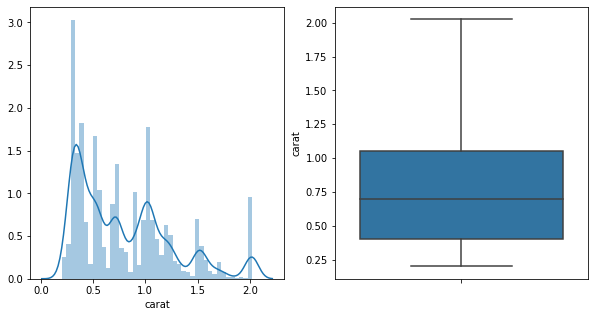

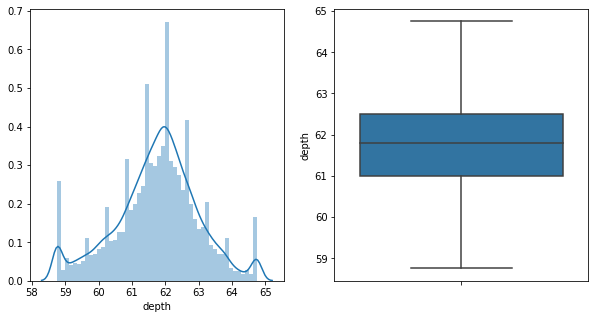

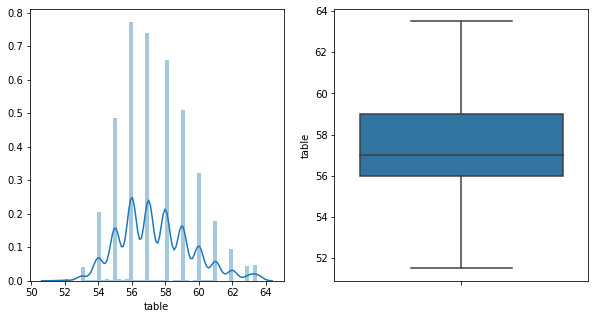

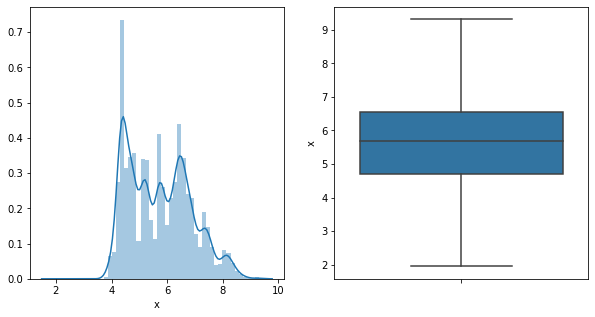

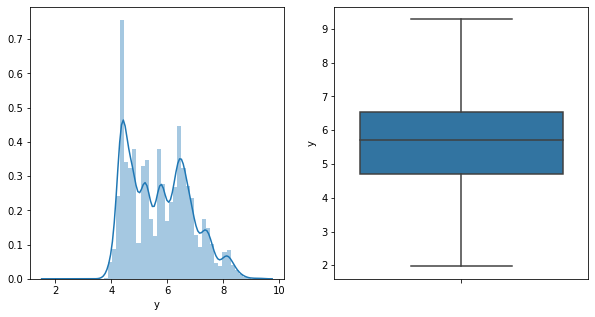

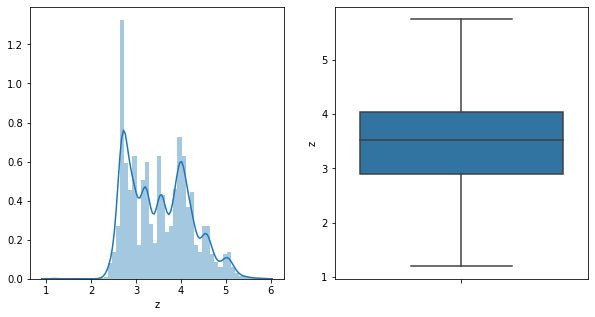

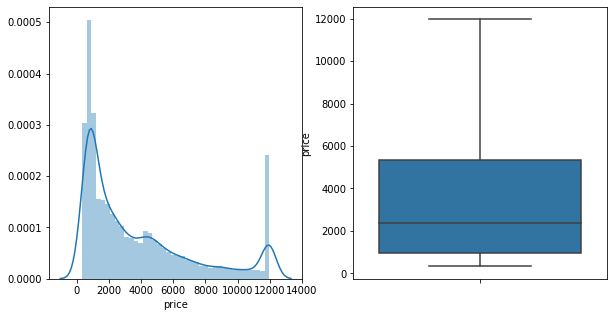

In [47]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(df[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=df, ax=axs[1],orient="v") 

# change categorical to numerical before modelling

In [48]:
df.replace(carrier,inplace=True)

In [49]:
df.replace(clar,inplace=True)

In [50]:
df= pd.get_dummies(df, prefix='color', columns=['color'],drop_first=True)
df

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
1,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
2,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
3,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
4,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
5,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,4,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,1,0,0,0
26964,0.33,4,9,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,0,1,0,0
26965,0.51,3,5,61.7,58.0,5.12,5.15,3.17,1656.0,1,0,0,0,0,0
26966,0.27,2,7,61.8,56.0,4.19,4.20,2.60,682.0,0,1,0,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 1 to 26967
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26931 non-null  float64
 1   cut      26931 non-null  int64  
 2   clarity  26931 non-null  int64  
 3   depth    26931 non-null  float64
 4   table    26931 non-null  float64
 5   x        26931 non-null  float64
 6   y        26931 non-null  float64
 7   z        26931 non-null  float64
 8   price    26931 non-null  float64
 9   color_E  26931 non-null  uint8  
 10  color_F  26931 non-null  uint8  
 11  color_G  26931 non-null  uint8  
 12  color_H  26931 non-null  uint8  
 13  color_I  26931 non-null  uint8  
 14  color_J  26931 non-null  uint8  
dtypes: float64(7), int64(2), uint8(6)
memory usage: 3.5 MB


# split into dependent and independent variable

In [52]:
df2=df.copy()

In [53]:
X_1=df2.drop('price',axis=1)
Y_1=df2.pop('price')

# add constant to X 

In [54]:
X_1=sm.add_constant(X_1)

# fit Y and X into model

In [55]:
model_1 = sm.OLS(Y_1,X_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.686e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:00   Log-Likelihood:            -2.2130e+05
No. Observations:               26931   AIC:                         4.426e+05
Df Residuals:                   26916   BIC:                         4.427e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2041.3391    590.624     -3.456      0.001   -3198.994    -883.684
carat       8888.5035     66.829    133.004      0.000    8757.515    9019.492
cut          108.8562      6.034     18.041      0.000      97.029     120.683
clarity      424.4546      3.727    113.887      0.000     417.150     431.760
depth         -5.6113      7.613     -0.737      0.461     -20.532       9.310
table        -10.7584      3.236     -3.325      0.001     -17.101      -4.416
x          -1521.9816     96.505    -15.771      0.000   -1711.137   -1332.827
y           1352.0031     95.250     14.194      0.000    1165.307    1538.699
z           -350.8498     84.950     -4.130      0.000    -517.357    -184.343
color_E     -214.0479     20.136    -10.630      0.000    -253.515    -174.581
color_F     -288.5310     20.399    -14.145      0.000    -328.514    -248.548
color_G     -465.4864     19.900    -23.391      0.000    -504.491    -426.481
color_H     -890.7506     21.248    -41.922      0.000    -932.398    -849.104
color_I    -1327.4081     23.668    -56.084      0.000   -1373.799   -1281.017
color_J    -1874.6131     29.030    -64.575      0.000   -1931.514   -1817.713
==============================================================================
Omnibus:                     3939.565   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18481.010
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       6.851   Cond. No.                     9.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict using model

In [56]:
ypred_1 = model_1.predict(X_1)

# find error in prediction

# MSE 

In [57]:
mse_1 = (np.sum(np.square(Y_1 - ypred_1)))/X_1.shape[0]
mse_1

803352.5753699493

# RMSE

In [58]:
Lr_1 = np.sqrt(mse_1)

print("The Root Mean Square Error (RMSE) of the model is",Lr_1)

The Root Mean Square Error (RMSE) of the model is 896.2993782045982


# drop the least contributing variable

In [59]:
X_1=X_1.drop('depth',axis=1)

# run model

In [60]:
model_2 = sm.OLS(Y_1,X_1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.892e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:00   Log-Likelihood:            -2.2130e+05
No. Observations:               26931   AIC:                         4.426e+05
Df Residuals:                   26917   BIC:                         4.427e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2447.0879    214.074    -11.431      0.000   -2866.685   -2027.491
carat       8881.0029     66.049    134.460      0.000    8751.543    9010.463
cut          110.0799      5.801     18.976      0.000      98.710     121.450
clarity      424.6316      3.719    114.173      0.000     417.342     431.921
table        -10.0043      3.070     -3.259      0.001     -16.022      -3.987
x          -1511.0278     95.353    -15.847      0.000   -1697.925   -1324.131
y           1372.2858     91.188     15.049      0.000    1193.552    1551.020
z           -396.4840     58.169     -6.816      0.000    -510.499    -282.469
color_E     -213.9866     20.135    -10.627      0.000    -253.453    -174.520
color_F     -288.5302     20.399    -14.145      0.000    -328.512    -248.548
color_G     -465.6696     19.898    -23.403      0.000    -504.671    -426.668
color_H     -891.0646     21.244    -41.945      0.000    -932.703    -849.426
color_I    -1327.7734     23.663    -56.112      0.000   -1374.154   -1281.393
color_J    -1874.8686     29.028    -64.589      0.000   -1931.765   -1817.973
==============================================================================
Omnibus:                     3936.608   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18438.386
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       6.846   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict using model

In [61]:
ypred_2 = model_2.predict(X_1)

# MSE

In [62]:
mse_2 = (np.sum(np.square(Y_1 - ypred_2)))/X_1.shape[0]
mse_2

803368.7917874948

# RMSE

In [63]:
Lr_2 = np.sqrt(mse_2)

print("The Root Mean Square Error (RMSE) of the model is",Lr_2)

The Root Mean Square Error (RMSE) of the model is 896.3084244764716


# Since VIF didnt help much to select the variable for prediction, we go with heatmap and apply PCA since there is high multicolinearity

# Apply PCA to avoid multicolinearity

In [64]:
data_scaled=X_1.drop('const',axis=1).apply(zscore)
data_scaled.head()

,carat,cut,clarity,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
1,-1.067499,0.979425,-0.639828,0.261620,-1.295854,-1.289084,-1.258805,2.116447,-0.461163,-0.515435,-0.423403,-0.338256,-0.237677
2,-1.002575,0.081091,2.396508,0.261620,-1.162650,-1.137021,-1.201376,-0.472490,-0.461163,1.940108,-0.423403,-0.338256,-0.237677
3,0.230995,-0.817244,1.181974,1.188793,0.275946,0.347825,0.349224,2.116447,-0.461163,-0.515435,-0.423403,-0.338256,-0.237677
4,-0.807801,0.979425,0.574706,-0.665554,-0.807441,-0.832896,-0.828083,-0.472490,2.168432,-0.515435,-0.423403,-0.338256,-0.237677
5,-1.045858,0.979425,1.789241,0.725207,-1.224812,-1.163856,-1.273163,-0.472490,2.168432,-0.515435,-0.423403,-0.338256,-0.237677


In [65]:
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00003713 -0.14187736 -0.35547319  0.18717157  0.98242497  0.98150029
   0.9778058  -0.14073835 -0.06290853 -0.02758671  0.10032797  0.16552283
   0.1764308 ]
 [-0.14187736  1.00003713  0.18329503 -0.43653188 -0.13226867 -0.13217986
  -0.1569995  -0.00477877 -0.0087425   0.04441969 -0.01072585 -0.011255
  -0.04374443]
 [-0.35547319  0.18329503  1.00003713 -0.15879015 -0.37596901 -0.37072352
  -0.37762391 -0.02063941  0.02572063  0.12502438 -0.02923718 -0.01911217
  -0.04212   ]
 [ 0.18717157 -0.43653188 -0.15879015  1.00003713  0.19908204  0.19347738
   0.1596242   0.01432053 -0.00493092 -0.03530871  0.00521183  0.01605576
   0.03721509]
 [ 0.98242497 -0.13226867 -0.37596901  0.19908204  1.00003713  0.99854965
   0.98847735 -0.13646967 -0.05335578 -0.02318116  0.09391115  0.1522581
   0.1653765 ]
 [ 0.98150029 -0.13217986 -0.37072352  0.19347738  0.99854965  1.00003713
   0.98812409 -0.13599374 -0.05289925 -0.02330189  0.09199099  0.15275439
   0.16610599]
 [ 

In [66]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-4.69268066e-01 -9.83105591e-03  8.66014857e-01 -2.03899878e-02
   3.23950680e-02  2.66213849e-02 -1.21881088e-01 -8.87007992e-02
  -4.99379241e-02  3.27972658e-02  2.93659089e-02 -1.47859853e-02
   1.27255308e-02]
 [ 1.11374014e-01  1.02053126e-02  7.02235690e-04 -3.92701556e-03
   4.14608401e-02 -7.04585892e-01  1.48626885e-02 -5.85793154e-01
  -9.42223292e-02  1.35827587e-01  1.29171763e-01 -2.89915989e-01
   1.33706249e-01]
 [ 2.25023541e-01 -7.07382297e-02 -1.78224182e-02  4.54788860e-03
   4.22311509e-03  1.31192619e-01 -8.97296991e-01 -2.53458265e-01
   1.93160335e-01 -8.03771956e-02 -1.74917987e-02  9.03657412e-02
  -7.18785642e-02]
 [-1.31660758e-01  2.06043018e-03 -6.68316646e-03 -6.30452832e-03
   4.85705110e-02 -6.90041097e-01 -2.23577349e-01  5.59476273e-01
   6.56812973e-02 -1.36336395e-01 -1.10557213e-01  3.06082640e-01
  -1.10676650e-01]
 [-4.72655435e-01 -2.22482421e-02 -2.55767722e-01  7.27672566e-01
  -3.91969857e-01 -3.09835828e-03 -1.08780317e-01 

In [67]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [33.30353370386218, 11.080267114059417, 9.480539726071003, 9.355898145207602, 8.966287622243728, 8.40299342761795, 7.82113783927547, 5.88702637683288, 4.305056931928929, 1.1002367799192239, 0.1875979253292826, 0.09846155858345533, 0.010962849068873643]


In [68]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.3035337   44.38380082  53.86434054  63.22023869  72.18652631
  80.58951974  88.41065758  94.29768396  98.60274089  99.70297767
  99.89057559  99.98903715 100.        ]


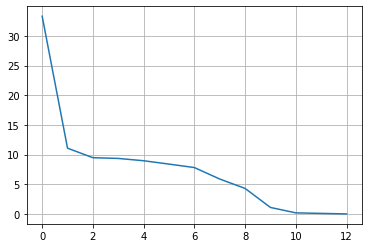

In [69]:
plt.plot(var_exp)
plt.grid()

In [70]:
from statsmodels.multivariate.pca import PCA

# taking cumulative variance explained till 80%, we take 6 component and also based on scree plot

In [71]:
pc = PCA(data_scaled, 
         ncomp=6,
         standardize=True,  
         normalize=True,    
         missing=None,
        method='eig')

In [72]:
df_comp = pc.loadings.T
df_comp

,carat,cut,clarity,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
comp_0,-0.469268,0.111374,0.225024,-0.131661,-0.472655,-0.472061,-0.470699,0.082784,0.037048,0.028819,-0.058277,-0.093007,-0.102510
comp_1,0.088701,0.585793,0.253458,-0.559476,0.084482,0.087350,0.089280,-0.332780,-0.102270,0.344643,0.036253,0.087542,-0.005236
comp_2,-0.014786,-0.289916,0.090366,0.306083,-0.013638,-0.014472,-0.016987,-0.135645,-0.322240,0.769968,-0.294106,-0.105990,0.019299
comp_3,-0.012726,-0.133706,0.071879,0.110677,-0.008552,-0.008485,-0.009833,-0.598139,0.760095,0.042668,-0.154038,-0.056696,-0.005045
comp_4,-0.029366,-0.129172,0.017492,0.110557,-0.032324,-0.034555,-0.033170,-0.330646,-0.162967,0.049895,0.832954,-0.346324,-0.120240
comp_5,-0.032797,-0.135828,0.080377,0.136336,-0.043775,-0.044332,-0.043920,-0.241777,-0.162676,-0.068687,0.099095,0.805404,-0.448870


# data after applying PCA

In [73]:
df_reduced_dimension = pc.factors
df_reduced_dimension.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5
1,0.007230,-0.005293,-0.003116,-0.009133,-0.004552,-0.003228
2,0.007955,0.004794,0.012092,0.001851,0.001850,0.001472
3,-0.000952,-0.008212,0.001701,-0.006844,-0.003606,-0.001698
4,0.005789,0.002637,-0.006929,0.010297,-0.002900,-0.002643
5,0.008029,-0.000386,-0.003872,0.011706,-0.001649,-0.000616


# Build model on PCA data

In [74]:
X_pca=sm.add_constant(df_reduced_dimension)

In [75]:
model_3 = sm.OLS(Y_1,X_pca).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 1.846e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:00   Log-Likelihood:            -2.3576e+05
No. Observations:               26931   AIC:                         4.715e+05
Df Residuals:                   26924   BIC:                         4.716e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3735.5095      9.346    399.710      0.000    3717.192    3753.827
comp_0     -4.982e+05   1533.666   -324.811      0.000   -5.01e+05   -4.95e+05
comp_1      1.023e+05   1533.666     66.701      0.000    9.93e+04    1.05e+05
comp_2      -857.0383   1533.666     -0.559      0.576   -3863.105    2149.028
comp_3      2845.3817   1533.666      1.855      0.064    -160.684    5851.448
comp_4      -2.76e+04   1533.666    -17.997      0.000   -3.06e+04   -2.46e+04
comp_5     -3.353e+04   1533.666    -21.861      0.000   -3.65e+04   -3.05e+04
==============================================================================
Omnibus:                     3314.432   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6776.532
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                       4.910   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# predict using model built after PCA

In [76]:
ypred_3 = model_3.predict(X_pca)

# find error

In [77]:
mse_3 = (np.sum(np.square(Y_1 - ypred_3)))/X_pca.shape[0]
mse_3

2351521.5201887405

# RMSE

In [78]:
Lr_3 = np.sqrt(mse_3)

print("The Root Mean Square Error (RMSE) of the model is",Lr_3)

The Root Mean Square Error (RMSE) of the model is 1533.467156540609


# drop the least contributing components comp_2 and comp_3

In [79]:
X_pca=X_pca.drop(['comp_2','comp_3'],axis=1)

# run the model

In [80]:
model_3_new = sm.OLS(Y_1,X_pca).fit()
model_3_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 2.769e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:00   Log-Likelihood:            -2.3576e+05
No. Observations:               26931   AIC:                         4.715e+05
Df Residuals:                   26926   BIC:                         4.716e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3735.5095      9.346    399.697      0.000    3717.191    3753.828
comp_0     -4.982e+05   1533.716   -324.800      0.000   -5.01e+05   -4.95e+05
comp_1      1.023e+05   1533.716     66.699      0.000    9.93e+04    1.05e+05
comp_4      -2.76e+04   1533.716    -17.997      0.000   -3.06e+04   -2.46e+04
comp_5     -3.353e+04   1533.716    -21.861      0.000   -3.65e+04   -3.05e+04
==============================================================================
Omnibus:                     3322.163   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6806.001
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                       4.915   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# predict using model built after dropping comp_2 and comp_3

In [81]:
ypred_3_new = model_3_new.predict(X_pca)

# find error

In [82]:
mse_3_new = (np.sum(np.square(Y_1 - ypred_3_new)))/X_pca.shape[0]
mse_3_new

2351849.421563842

# RMSE

In [83]:
Lr_3_new = np.sqrt(mse_3_new)

print("The Root Mean Square Error (RMSE) of the model is",Lr_3_new)

The Root Mean Square Error (RMSE) of the model is 1533.574067844081


In [84]:
df # dataset after outlier treatment

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
1,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
2,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
3,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
4,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
5,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,4,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,1,0,0,0
26964,0.33,4,9,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,0,1,0,0
26965,0.51,3,5,61.7,58.0,5.12,5.15,3.17,1656.0,1,0,0,0,0,0
26966,0.27,2,7,61.8,56.0,4.19,4.20,2.60,682.0,0,1,0,0,0,0


# scale the data using the original dataset and use scaled data to determine the most important predictor using coeff values

In [85]:
scaled_data=df.apply(zscore)
scaled_data

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
1,-1.067499,0.979425,-0.639828,0.283357,0.261620,-1.295854,-1.289084,-1.258805,-0.933331,2.116447,-0.461163,-0.515435,-0.423403,-0.338256,-0.237677
2,-1.002575,0.081091,2.396508,-0.748036,0.261620,-1.162650,-1.137021,-1.201376,-0.793469,-0.472490,-0.461163,1.940108,-0.423403,-0.338256,-0.237677
3,0.230995,-0.817244,1.181974,0.362695,1.188793,0.275946,0.347825,0.349224,0.736365,2.116447,-0.461163,-0.515435,-0.423403,-0.338256,-0.237677
4,-0.807801,0.979425,0.574706,-0.113332,-0.665554,-0.807441,-0.832896,-0.828083,-0.765208,-0.472490,2.168432,-0.515435,-0.423403,-0.338256,-0.237677
5,-1.045858,0.979425,1.789241,-1.065388,0.725207,-1.224812,-1.163856,-1.273163,-0.852586,-0.472490,2.168432,-0.515435,-0.423403,-0.338256,-0.237677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,0.685468,0.081091,-0.639828,0.442033,0.261620,0.782118,0.705620,0.794304,0.482306,-0.472490,-0.461163,1.940108,-0.423403,-0.338256,-0.237677
26964,-1.002575,0.979425,2.396508,0.124681,-1.129140,-1.144890,-1.172801,-1.143946,-0.755980,-0.472490,-0.461163,-0.515435,2.361814,-0.338256,-0.237677
26965,-0.613026,0.081091,-0.032561,-0.033994,0.261620,-0.541035,-0.519826,-0.526577,-0.599680,2.116447,-0.461163,-0.515435,-0.423403,-0.338256,-0.237677
26966,-1.132424,-0.817244,1.181974,0.045344,-0.665554,-1.366895,-1.369588,-1.344950,-0.880559,-0.472490,2.168432,-0.515435,-0.423403,-0.338256,-0.237677


# execute model on scaled data to determine the most important variable

In [86]:
X_predictor=scaled_data.drop('price',axis=1)
Y_predictor=scaled_data.pop('price')

In [87]:
X_predictor=sm.add_constant(X_predictor)

In [88]:
model_predictor = sm.OLS(Y_predictor,X_predictor).fit()
model_predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.686e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:01   Log-Likelihood:                -1776.6
No. Observations:               26931   AIC:                             3583.
Df Residuals:                   26916   BIC:                             3706.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.24e-18      0.002  -5.23e-15      1.000      -0.003       0.003
carat          1.1844      0.009    133.004      0.000       1.167       1.202
cut            0.0349      0.002     18.041      0.000       0.031       0.039
clarity        0.2016      0.002    113.887      0.000       0.198       0.205
depth         -0.0020      0.003     -0.737      0.461      -0.007       0.003
table         -0.0067      0.002     -3.325      0.001      -0.011      -0.003
x             -0.4942      0.031    -15.771      0.000      -0.556      -0.433
y              0.4359      0.031     14.194      0.000       0.376       0.496
z             -0.0705      0.017     -4.130      0.000      -0.104      -0.037
color_E       -0.0238      0.002    -10.630      0.000      -0.028      -0.019
color_F       -0.0316      0.002    -14.145      0.000      -0.036      -0.027
color_G       -0.0547      0.002    -23.391      0.000      -0.059      -0.050
color_H       -0.0922      0.002    -41.922      0.000      -0.097      -0.088
color_I       -0.1162      0.002    -56.084      0.000      -0.120      -0.112
color_J       -0.1216      0.002    -64.575      0.000      -0.125      -0.118
==============================================================================
Omnibus:                     3939.565   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18481.010
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       6.851   Cond. No.                         55.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per Q3, perform train test split on df dataset(this is to test the accuracy using split on the original dataset, having pre processing data)

In [89]:
X_2=df.drop('price',axis=1)
Y_2=df.pop('price')

In [90]:
df

,carat,cut,clarity,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
1,0.30,4,4,62.1,58.0,4.27,4.29,2.66,1,0,0,0,0,0
2,0.33,3,9,60.8,58.0,4.42,4.46,2.70,0,0,1,0,0,0
3,0.90,2,7,62.2,60.0,6.04,6.12,3.78,1,0,0,0,0,0
4,0.42,4,6,61.6,56.0,4.82,4.80,2.96,0,1,0,0,0,0
5,0.31,4,8,60.4,59.0,4.35,4.43,2.65,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,3,4,62.3,58.0,6.61,6.52,4.09,0,0,1,0,0,0
26964,0.33,4,9,61.9,55.0,4.44,4.42,2.74,0,0,0,1,0,0
26965,0.51,3,5,61.7,58.0,5.12,5.15,3.17,1,0,0,0,0,0
26966,0.27,2,7,61.8,56.0,4.19,4.20,2.60,0,1,0,0,0,0


In [91]:
X_2=sm.add_constant(X_2)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size=.30, random_state=1)

# model building 

In [93]:
model_4 = sm.OLS(Y_train,X_train).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.847e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:01   Log-Likelihood:            -1.5502e+05
No. Observations:               18851   AIC:                         3.101e+05
Df Residuals:                   18836   BIC:                         3.102e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2471.0472    732.772     -3.372      0.001   -3907.345   -1034.749
carat       8935.5373     80.443    111.079      0.000    8777.862    9093.213
cut          105.2932      7.251     14.521      0.000      91.080     119.506
clarity      432.5937      4.484     96.479      0.000     423.805     441.382
depth          3.4839      9.652      0.361      0.718     -15.436      22.404
table        -12.7473      3.891     -3.276      0.001     -20.373      -5.121
x          -1334.3942    115.138    -11.590      0.000   -1560.074   -1108.714
y           1259.1599    114.487     10.998      0.000    1034.756    1483.564
z           -525.3005    113.088     -4.645      0.000    -746.963    -303.638
color_E     -208.0498     24.180     -8.604      0.000    -255.444    -160.656
color_F     -299.5637     24.421    -12.267      0.000    -347.431    -251.696
color_G     -473.6063     23.837    -19.869      0.000    -520.329    -426.884
color_H     -905.4945     25.496    -35.516      0.000    -955.468    -855.521
color_I    -1341.2183     28.526    -47.017      0.000   -1397.133   -1285.304
color_J    -1876.0853     35.094    -53.459      0.000   -1944.873   -1807.298
==============================================================================
Omnibus:                     2745.530   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13621.202
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       6.976   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict using above model

In [94]:
ypred_4 = model_4.predict(X_train)

# MSE on train data

In [95]:
mse_4 = (np.sum(np.square(Y_train - ypred_4)))/X_train.shape[0]
mse_4

813347.7505599805

# RMSE on train data

In [96]:
Lr_4 = np.sqrt(mse_4)

print("The Root Mean Square Error (RMSE) of the model is",Lr_4)

The Root Mean Square Error (RMSE) of the model is 901.8579436696117


# predict on test data

In [97]:
ypred_4_test = model_4.predict(X_test)

# MSE on test data

In [98]:
mse_4_test = (np.sum(np.square(Y_test - ypred_4_test)))/X_test.shape[0]
mse_4_test

781422.2522345132

# RMSE on test data

In [99]:
Lr_4_test = np.sqrt(mse_4_test)

print("The Root Mean Square Error (RMSE) of the model is",Lr_4_test)

The Root Mean Square Error (RMSE) of the model is 883.9809116912611


# split data in train and test for model finalized in question 2( the one with outliers treated and least contributing variable depth dropped)

In [100]:
X_train_model2, X_test_model2, Y_train_model2, Y_test_model2 = train_test_split(X_1, Y_1, test_size=.30, random_state=1)

In [101]:
model_5 = sm.OLS(Y_train_model2,X_train_model2).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.990e+04
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:42:01   Log-Likelihood:            -1.5502e+05
No. Observations:               18851   AIC:                         3.101e+05
Df Residuals:                   18837   BIC:                         3.102e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2223.8586    260.596     -8.534      0.000   -2734.649   -1713.068
carat       8939.5299     79.677    112.197      0.000    8783.356    9095.704
cut          104.6146      7.003     14.938      0.000      90.888     118.341
clarity      432.5001      4.476     96.622      0.000     423.726     441.274
table        -13.1567      3.721     -3.535      0.000     -20.451      -5.862
x          -1341.9306    113.226    -11.852      0.000   -1563.863   -1119.998
y           1245.9346    108.462     11.487      0.000    1033.340    1458.530
z           -494.2978     73.555     -6.720      0.000    -638.472    -350.123
color_E     -208.1270     24.178     -8.608      0.000    -255.518    -160.736
color_F     -299.6215     24.420    -12.269      0.000    -347.487    -251.756
color_G     -473.5856     23.836    -19.868      0.000    -520.307    -426.864
color_H     -905.3433     25.492    -35.515      0.000    -955.309    -855.377
color_I    -1341.0719     28.523    -47.017      0.000   -1396.979   -1285.165
color_J    -1875.9878     35.092    -53.459      0.000   -1944.771   -1807.204
==============================================================================
Omnibus:                     2746.861   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13643.449
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       6.979   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predict and find error in train data

In [102]:
ypred_5 = model_5.predict(X_train_model2)

In [103]:
mse_5 = (np.sum(np.square(Y_train_model2 - ypred_5)))/X_train_model2.shape[0]
mse_5

813353.3757058295

In [104]:
Lr_5 = np.sqrt(mse_5)

print("The Root Mean Square Error (RMSE) of the model is",Lr_5)

The Root Mean Square Error (RMSE) of the model is 901.8610623071768


# find error in test data

In [105]:
ypred_5_test = model_5.predict(X_test_model2)

In [106]:
mse_5_test = (np.sum(np.square(Y_test_model2 - ypred_5_test)))/X_test_model2.shape[0]
mse_5_test

781306.1298628175

In [107]:
Lr_5_test = np.sqrt(mse_5_test)

print("The Root Mean Square Error (RMSE) of the model is",Lr_5_test)

The Root Mean Square Error (RMSE) of the model is 883.9152277581926
